<a href="https://colab.research.google.com/github/Rishabh7777/StockMaster/blob/main/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader('INFY', data_source='yahoo', start='2015-04-01', end='2020-11-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,8.7500,8.6400,8.7075,8.6600,13315200.0,7.200803
2015-04-02,8.6950,8.6475,8.6625,8.6600,5036400.0,7.200803
2015-04-06,8.7050,8.6275,8.6825,8.6375,7016400.0,7.182095
2015-04-07,8.7925,8.6325,8.6425,8.7675,19201600.0,7.290191
2015-04-08,8.9625,8.8550,8.8975,8.9450,7363600.0,7.437781
...,...,...,...,...,...,...
2020-11-23,15.3900,15.2300,15.3000,15.3800,5346400.0,15.089099
2020-11-24,15.6000,15.4500,15.5200,15.5300,12677400.0,15.236261
2020-11-25,15.2600,15.0400,15.1600,15.1000,5194100.0,14.814395


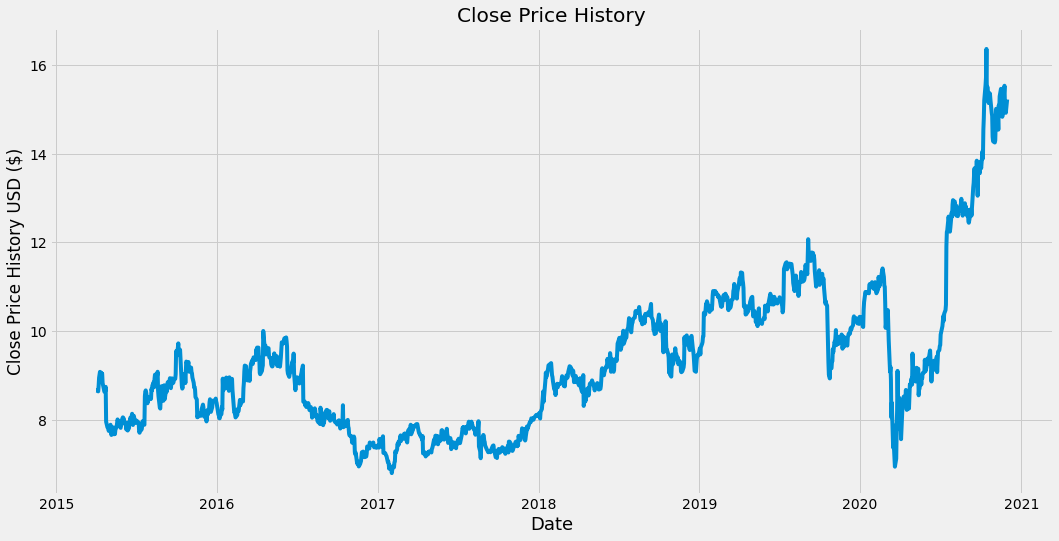

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price History USD ($)')
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * 0.8 )

print("Total rows:")
print(training_data_len)

Total rows:
1143


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# print(scaled_data)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # if i<=61:
  #   print(x_train)
  #   print(y_train)
  #   print()

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1083, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1083/1083 [==============================] - 34s 29ms/step - loss: 0.0013
Epoch 2/5
1083/1083 [==============================] - 31s 29ms/step - loss: 5.5659e-04
Epoch 3/5
1083/1083 [==============================] - 31s 29ms/step - loss: 4.6445e-04
Epoch 4/5
1083/1083 [==============================] - 31s 29ms/step - loss: 4.1495e-04
Epoch 5/5
1083/1083 [==============================] - 31s 29ms/step - loss: 3.2717e-04


In [ ]:
test_data = scaled_data[training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
# x_test

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(len(x_test[0]))

60


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# predictions

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

0.04781890668367085


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


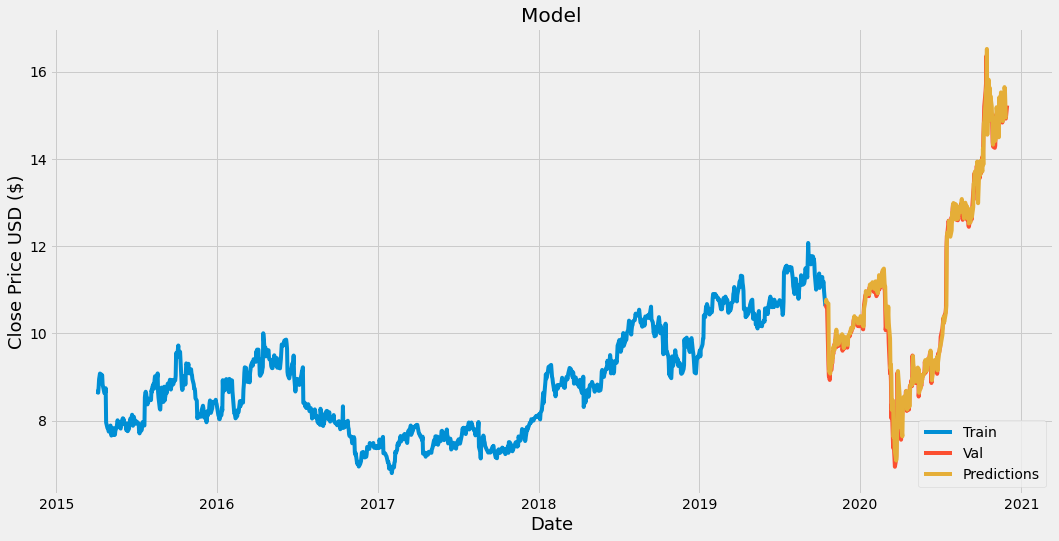

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-10-15,10.67,10.681320
2019-10-16,10.60,10.767959
2019-10-17,10.59,10.702496
2019-10-18,10.57,10.703011
2019-10-21,9.29,10.681254
...,...,...
2020-11-23,15.38,15.043386
2020-11-24,15.53,15.642699
2020-11-25,15.10,15.578410


In [ ]:
testing_quote = web.DataReader('INFY', data_source='yahoo', start='2021-09-01', end='2021-11-30')
new_df = testing_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("Predicted price")
print(pred_price)

Predicted price
[[21.912277]]


In [ ]:
new = web.DataReader('INFY', data_source='yahoo', start='2021-12-01', end='2021-12-01')
print("Actual price")
display(new.filter(['Close']))

Actual price


,Close
Date,
2021-12-01,22.440001
